In [40]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import os
import warnings

import cartopy.crs as ccrs

import pyart
import hvplot.xarray
warnings.filterwarnings('ignore')

## Importing Data:

In [2]:
username = 'hseppala'
token = 

# Set the datastream and start/enddates
datastream = 'anxkazrcfrgeqcM1.b1'
startdate = '2020-03-12'
enddate = '2020-03-14'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200312.170003.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200312.220001.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200312.200002.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200312.035957.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200312.080005.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200313.150000.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200313.170003.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200313.080005.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200312.010002.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200312.045959.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200313.220000.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200313.050004.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200313.200003.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200312.130004.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200313.180003.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200312.150003.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200313.110005.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200312.070005.nc
[DOWNLOADING] anxkazrcfrgeqcM1.b1.20200312.180

In [52]:
files = sorted(result)
ds = xr.open_mfdataset(files[24:])

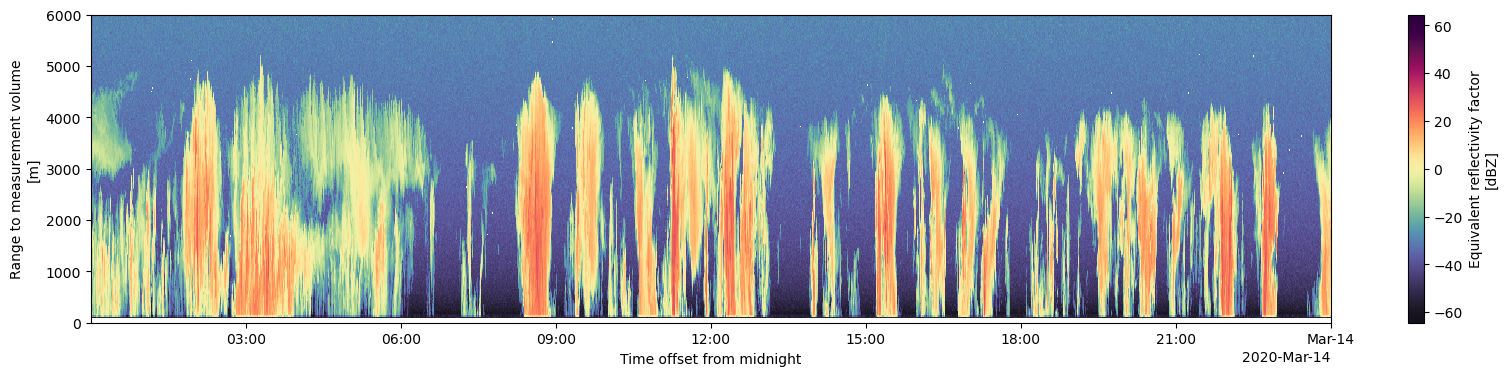

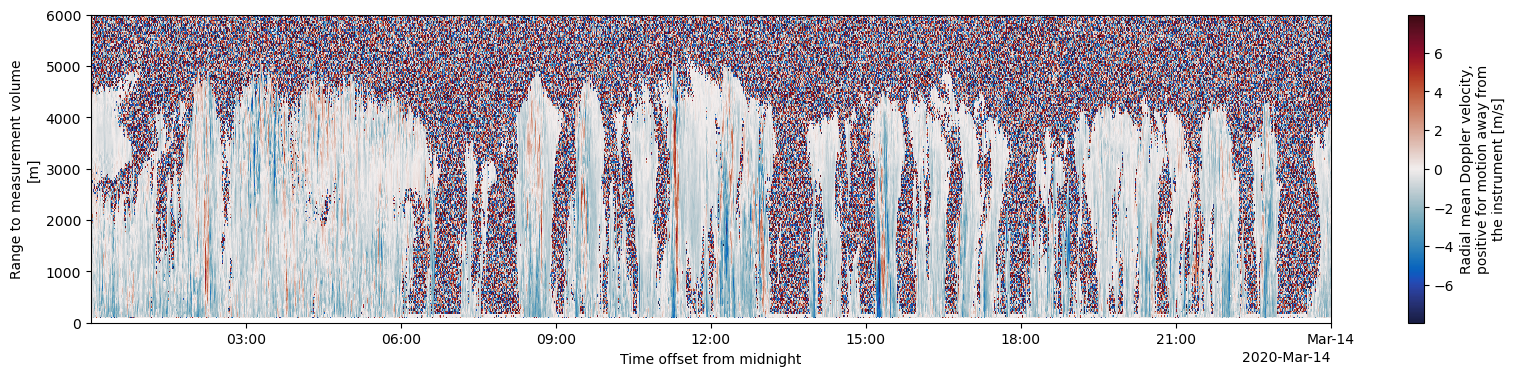

In [77]:
ds.reflectivity.plot(x='time',cmap='pyart_SpectralExtended',size=4,aspect=5,ylim=[0,6000])
ds.mean_doppler_velocity.plot(x='time',cmap='pyart_balance',size=4,aspect=5,ylim=[0,6000])

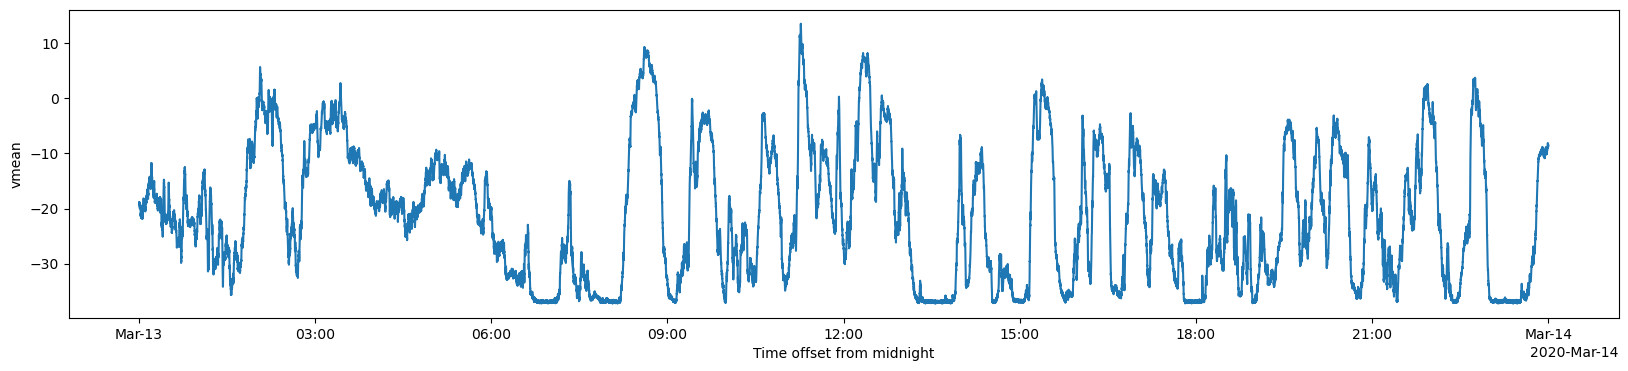

In [78]:
ds['vmean']=ds['reflectivity'][:,:200].mean(axis=1)
ds.vmean.plot(x='time',size=4,aspect=5)

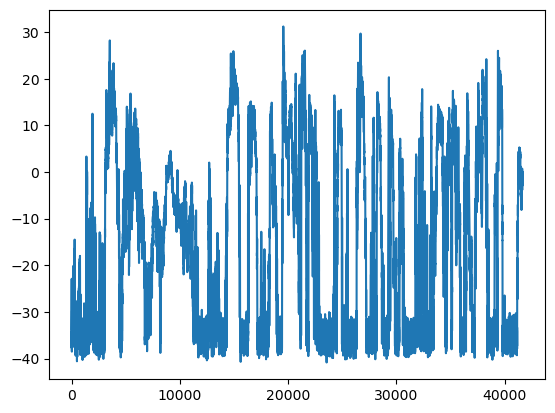

In [86]:
plt.plot(ds['reflectivity'][:,90])

In [89]:
datastream = 'nsakazrcfrgeC1.a1'
startdate = '2020-10-06'
enddate = '2020-10-07'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.120009.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.160008.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.070004.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.060004.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.030004.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.080002.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.180008.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.190009.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.140005.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.100004.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.200001.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.130009.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.170004.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.105956.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.020010.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.210004.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.090004.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.220006.nc
[DOWNLOADING] nsakazrcfrgeC1.a1.20201006.040009.nc
[DOWNLOADING] nsakazrcfrgeC1.a1

In [99]:
files = sorted(result)

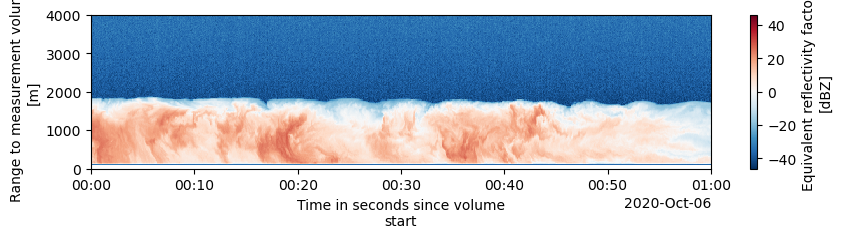

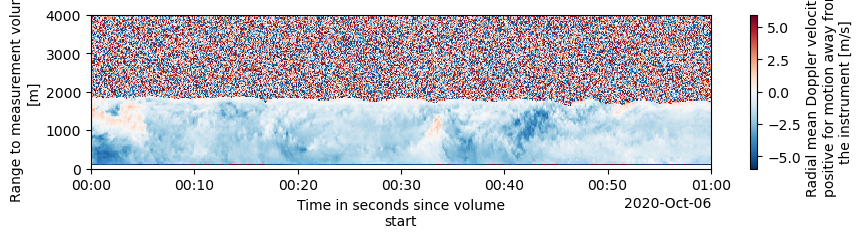

In [109]:
for i in [files[-3]]:
    ds = xr.open_dataset(i)
    ds.reflectivity.plot(x='time',ylim=[0,4000],size=2,aspect=5)
    plt.show()
    ds.mean_doppler_velocity.plot(x='time',ylim=[0,4000],size=2,aspect=5)

In [165]:
datastream = 'nsathermocldphaseC1.c1'
startdate = '2020-10-06'
enddate = '2020-10-06'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] nsathermocldphaseC1.c1.20201006.000000.nc

If you use these data to prepare a publication, please cite:

Zhang, D., & Levin, M. Thermodynamic cloud phase (THERMOCLDPHASE). Atmospheric
Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1871014



In [166]:
print(result)
ds = act.io.read_arm_netcdf(result)
ds.clean.cleanup()

['/data/home/hseppala/ARM-2024-high-latitude/notebooks/nsathermocldphaseC1.c1/nsathermocldphaseC1.c1.20201006.000000.nc']


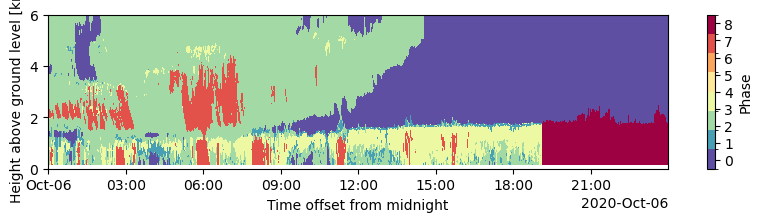

In [181]:
ds.cloud_phase_mplgr.where(ds.cloud_phase_mplgr >=0 ).plot(x='time',vmin=-0.5,vmax=8.5,ylim=[0,6],size=2,aspect=5,levels=9, cmap="Spectral_r",cbar_kwargs={'ticks': [0,1,2,3,4,5,6,7,8],'label':'Phase'})

In [188]:

print(['clear_sky', 'liquid', 'ice', 'mixed_phase', 'drizzle', 'liquid_drizzle', 'rain', 'snow', 'unknown'])

['clear_sky', 'liquid', 'ice', 'mixed_phase', 'drizzle', 'liquid_drizzle', 'rain', 'snow', 'unknown']


In [183]:
datastream = 'anxthermocldphaseM1.c1'
startdate = '2020-03-13'
enddate = '2020-03-13'
# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] anxthermocldphaseM1.c1.20200313.000000.nc

If you use these data to prepare a publication, please cite:

Zhang, D., & Levin, M. Thermodynamic cloud phase (THERMOCLDPHASE). Atmospheric
Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1871014



['clear_sky', 'liquid', 'ice', 'mixed_phase', 'drizzle', 'liquid_drizzle', 'rain', 'snow', 'unknown']


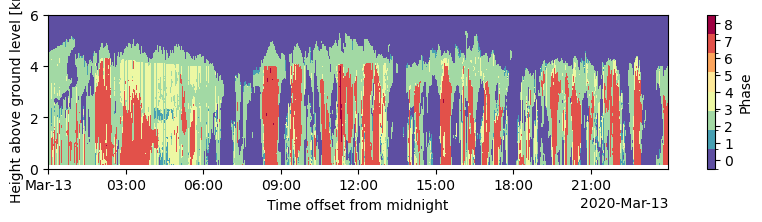

In [185]:
phases = ['clear_sky', 'liquid', 'ice', 'mixed_phase', 'drizzle', 'liquid_drizzle', 'rain', 'snow', 'unknown']
print(phases)
ds = act.io.read_arm_netcdf(result)
ds.clean.cleanup()
ds.cloud_phase_mplgr.where(ds.cloud_phase_mplgr >=0 ).plot(x='time',vmin=-0.5,vmax=8.5,ylim=[0,6],size=2,aspect=5,levels=9, cmap="Spectral_r",cbar_kwargs={'ticks': [0,1,2,3,4,5,6,7,8],'label':'Phase'})